# Kukunarapu Ruthika - task2-prediction using unsupervised learning

In [3]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
#importing data
dataset=pd.read_csv('Iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Text(0, 0.5, "['SepalWidthCm']")

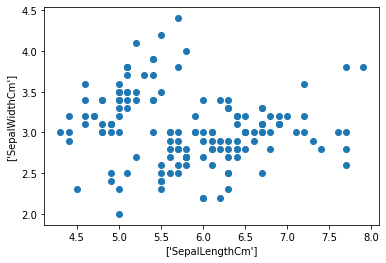

In [5]:
#scatter plot for sepal length versus sepalwidth
plt.scatter(dataset['SepalLengthCm'],dataset['SepalWidthCm'])
plt.xlabel(['SepalLengthCm'])
plt.ylabel(['SepalWidthCm'])

In [6]:
x=dataset.iloc[:,1:5]
x.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
#creating an object of KMeans
kmeans=KMeans(n_clusters=2)

In [8]:
#fit the data
kmeans.fit(x)

KMeans(n_clusters=2)

In [9]:
#predicting based on the data supplied
pred=kmeans.predict(x)

In [10]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
pd.Series(pred).value_counts()

0    97
1    53
dtype: int64

In [12]:
kmeans.inertia_

152.36870647733915

In [14]:
kmeans.score(x)

-152.36870647733912

In [24]:
SSE=[]

In [25]:
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)
    

C:\Users\K.Ruthika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\K.Ruthika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\K.Ruthika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\K.Ruthika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\K.Ruthika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarn

In [26]:
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})

Text(0, 0.5, 'Inertia')

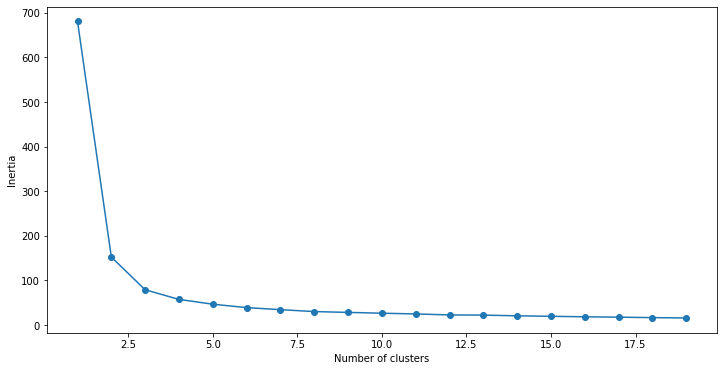

In [28]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)

In [31]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [32]:
SSE_scaled= []

In [33]:
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data_scaled)
    SSE_scaled.append(kmeans.inertia_)

C:\Users\K.Ruthika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\K.Ruthika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\K.Ruthika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\K.Ruthika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\K.Ruthika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarn

Text(0, 0.5, 'SSE')

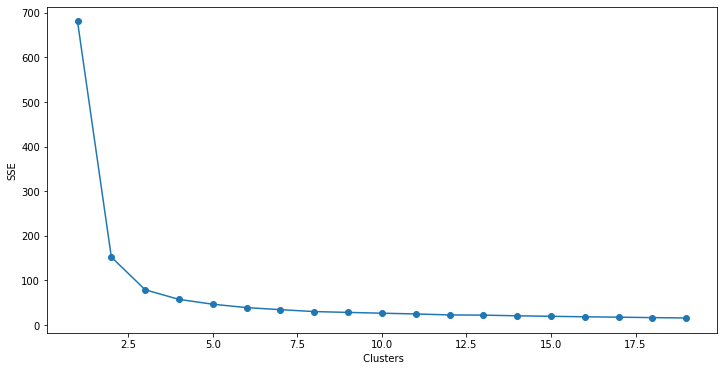

In [34]:
plt.figure(figsize=(12,6))
frame_scaled = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE_scaled})
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.xlabel(' Clusters')
plt.ylabel('SSE')

In [47]:
kmeans=KMeans(n_jobs = -1,n_clusters=3)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)


C:\Users\K.Ruthika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [48]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [49]:
frame = pd.DataFrame(data_scaled)


In [50]:
frame['Cluster'] = pred

In [51]:
frame['Cluster'].value_counts()

2    53
1    50
0    47
Name: Cluster, dtype: int64

In [52]:
frame.head()

,0,1,2,3,Cluster
0,-0.900681,1.032057,-1.341272,-1.312977,1
1,-1.143017,-0.124958,-1.341272,-1.312977,1
2,-1.385353,0.337848,-1.398138,-1.312977,1
3,-1.506521,0.106445,-1.284407,-1.312977,1
4,-1.021849,1.263460,-1.341272,-1.312977,1


In [53]:
dat_with_cluster=dataset.copy()
dat_with_cluster['Clusters']=pred

In [54]:
dat_with_cluster

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0


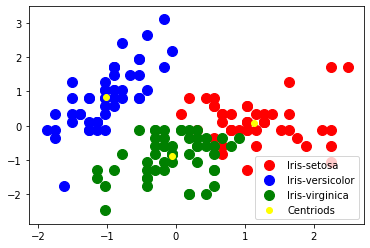

In [65]:
plt.scatter(data_scaled[pred == 0,0], data_scaled[pred == 0,1],s=100,c = 'red', label = 'Iris-setosa')
plt.scatter(data_scaled[pred == 1,0], data_scaled[pred == 1,1],s=100,c = 'blue', label = 'Iris-versicolor')
plt.scatter(data_scaled[pred == 2,0], data_scaled[pred == 2,1],s=100,c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='yellow' ,label='Centriods')
plt.legend()



